In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## imports

In [90]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pylamp.loss.losses import CrossEntropyLoss
from pylamp.neural.activations import Softmax
from pylamp.neural.layers import Linear
from pylamp.neural.sequential import Sequential
from pylamp.optim.optimizer import SGD, Optim
from pylamp.utils.plotter import Display



## Loading data

You can find the dataset on [kaggle](https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset)

In [91]:
# Load the CSV file
file_path = './data/obesity/ObesityClassification.csv'
data = pd.read_csv(file_path, index_col='ID')

In [92]:
data.head()

,Age,Gender,Height,Weight,BMI,Label
ID,,,,,,
1,25,Male,175,80,25.3,Normal Weight
2,30,Female,160,60,22.5,Normal Weight
3,35,Male,180,90,27.3,Overweight
4,40,Female,150,50,20.0,Underweight
5,45,Male,190,100,31.2,Obese


## Preprocessing data

In [93]:
# Turn 'Gender' feature to numerical: 0 for Female, 1 for Male
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Separate features and target
X = data.drop('Label', axis=1).values
y = data['Label']

# features scaling
scaler = StandardScaler() 
X = scaler.fit_transform(X)

# one hot encode label
y = pd.get_dummies(y, prefix='')
labels = [x.replace('_','') for x in y.columns]
y = y.values.astype(int)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (108, 5)
y shape: (108, 4)


## Train Test split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the model

Linear(5, 4) => Softmax()

In [95]:


input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Create a sequential model
model = Sequential()

# Add modules to the sequential model
model.add_module(Linear(input_size=input_size, output_size=output_size))
model.add_module(Softmax())

loss_func = CrossEntropyLoss()
optimizer = Optim(model,loss_func,1e-2)
batch_size = 16
epochs = 200
losses = SGD(optimizer,X_train, y_train, batch_size,epochs,verbose=True)

Epoch 1/200, Average Loss: 1.35847924125259
Epoch 21/200, Average Loss: 1.1102350745962568
Epoch 41/200, Average Loss: 1.0677492155743344
Epoch 61/200, Average Loss: 1.0534949589835771
Epoch 81/200, Average Loss: 1.0101630429489337
Epoch 101/200, Average Loss: 1.0066962423704615
Epoch 121/200, Average Loss: 0.9978379793466946
Epoch 141/200, Average Loss: 0.9795163652194336
Epoch 161/200, Average Loss: 0.9845091145654502
Epoch 181/200, Average Loss: 0.9641895993468536
Training finished.


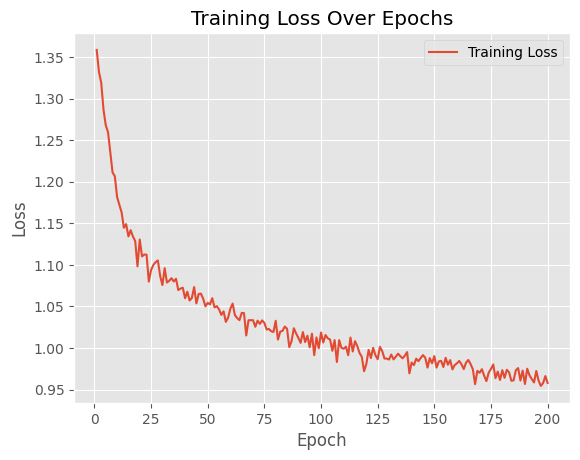

In [96]:
Display().plot_loss(losses)

# Evaluating the model

In [97]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.forward(X_test), axis=1)

In [98]:
print("Accuracy:", accuracy_score(y_true, y_pred))

Accuracy: 0.8636363636363636


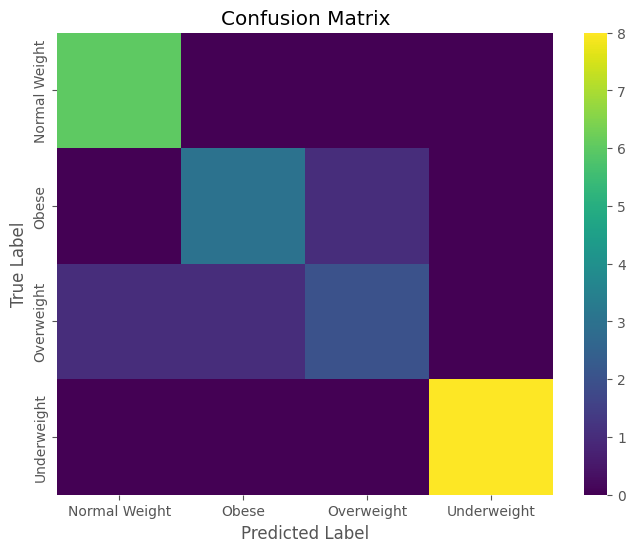

In [99]:
Display().confusion_matrix(y_true, y_pred,labels=labels)